# **UAS ANALISIS MEDIA SOSIAL**

| NIM | Nama | Deskripsi Tugas |
| -------- | -------- | -------- |
|11220940000011	|Ulfatul Adawiyah| Ambil data, Coding, Membuat ppt, Presentasi |
|11220940000020  | Muhammad Abdul Ghofur | Ambil data, Coding, Membuat ppt, Presentasi |
|11220940000055	| Miranita Anisa Rohmah| Ambil data, Coding, Membuat ppt, Presentasi |
|11220940000056 |	Syafiqah Marsya Kholiyadi| Ambil data, Coding, Membuat ppt, Presentasi |

**TOPIK**

Analisis Sentimen Publik dan Topic Modeling Terhadap Mobil LCGC di Indonesia

## PENDAHULAUN

Program mobil LCGC yang digagas pemerintah untuk menyediakan kendaraan hemat energi dan terjangkau. Namun, kebijakan ini juga menimbulkan beragam reaksi dari masyarakat, mulai dari dukungan atas efisiensi BBM hingga kritik terhadap fitur dan kualitas. Analisis sentimen dan topik modelling penting dilakukan untuk memahami persepsi publik secara real-time serta mengevaluasi penerimaan kebijakan dan produk LCGC di lapangan.

## RUMUSAN MASALAH

1. Bagaimana persepsi publik terhadap mobil LCGC di Indonesia berdasarkan komentar di YouTube?

2. Apa saja hal yang identik atau mencerminkan mobil LCGC berdasarkan Hashtag Analysis?

3. Apa saja topik utama yang dibicarakan masyarakat terkait mobil LCGC di media sosial?


**PERIODE DATA**

JULI 2022 - JULI 2025

**SUMBER DATA**

YOUTUBE

**KATA KUNCI**

*   Mobil LCGC
*   Mobil Murah
*   Mobil Irit






In [ ]:
!pip install Sastrawi
!pip install unidecode
!pip install textblob
!python -m textblob.download_corpora
!pip install wordcloud matplotlib
!pip install squarify

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.


In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from html import unescape
import pandas as pd
from unidecode import unidecode # Import the unidecode function
from textblob import TextBlob # Import the TextBlob class
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
import requests
import json
nltk.download('stopwords')
from nltk.corpus import stopwords
from textblob import TextBlob
import ast
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D
from wordcloud import WordCloud
import re, operator, numpy as np
from tqdm import tqdm
from collections import Counter
import squarify


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import pandas as pd

# Gunakan wget untuk mendownload file
!wget  "https://raw.githubusercontent.com/Putrimaesarah/Analisis-Sentimen-dan-Topik-modeling-terhadap-Mobil-LCGC-di-Indonesia-melalui-Media-Sosial/main/Data%20Final%20Mobil%20LCGC.xlsx"


--2025-07-17 22:34:47--  https://raw.githubusercontent.com/Putrimaesarah/Analisis-Sentimen-dan-Topik-modeling-terhadap-Mobil-LCGC-di-Indonesia-melalui-Media-Sosial/main/Data%20Final%20Mobil%20LCGC.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 417092 (407K) [application/octet-stream]
Saving to: ‘Data Final Mobil LCGC.xlsx.6’

Data Final Mobil LC 100%[===================>] 407.32K  --.-KB/s    in 0.05s   

2025-07-17 22:34:47 (8.70 MB/s) - ‘Data Final Mobil LCGC.xlsx.6’ saved [417092/417092]



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/Putrimaesarah/Analisis-Sentimen-dan-Topik-modeling-terhadap-Mobil-LCGC-di-Indonesia-melalui-Media-Sosial/main/Data%20Final%20Mobil%20LCGC.xlsx"

# Melihat daftar nama sheet
xls = pd.ExcelFile(url, engine='openpyxl')
print("Sheet yang tersedia:", xls.sheet_names)


Sheet yang tersedia: ['Sheet5', 'metadata', 'Slang StopWord']


In [ ]:
# Baca salah satu sheet (misal Sheet5)
df = xls.parse('Sheet5')

# Loop: tampilkan nilai unik dari setiap kolom
print("\nJumlah dan contoh nilai unik per kolom:")
for col in df.columns:
    print(f"\n🔹 Kolom: '{col}'")
    print(f"Jumlah nilai unik: {df[col].nunique()}")
    print("Contoh nilai unik:", df[col].dropna().unique()[:34])  # tampilkan max 5 contoh


Jumlah dan contoh nilai unik per kolom:

🔹 Kolom: 'videoId'
Jumlah nilai unik: 36
Contoh nilai unik: ['b5ibmpuS0L4' '6b1MGWf2YmE' 'ziz0XVGyDCA' 'B-QVbHrUv-M' 'cwu8714Osn8'
 'cXXsrYLMXQE' '562aRopQR54' 'WT3o0644loA' 'ocSbcTBBIVA' 'Q9uBhQRF6rI'
 'yT_NybqmH14' '4xW-qPAcnyQ' 'oMg499GvYSA' 'kYl2ilmQ0-A' '6W8q6lWEDYg'
 '54rfrmjYUo4' 'wEu9aJFuVMk' 'a2W7iHvIluk' 'qg33E4XFRgQ' 'djABt7IfFmg'
 'mUfoEIn4u6E' 'ggz3f45l354' 'RAlGSAkre7U' 'Q-bE-wFYVTw' '4deEVTScfyU'
 'uFeO4U7NBSY' '2DQo5D1_ymg' 'Bhaa6NZ_cXw' 'OKVDfNavdXI' 'Th_G-abA5sw'
 'Tetap EZ"' 'cV9kWcBDQ38' '8Y5fZqBCMuc' 'BX172h-4jDg']

🔹 Kolom: 'publishedAt'
Jumlah nilai unik: 5188
Contoh nilai unik: ['2025-06-06T09:37:47Z' '2025-04-15T13:18:52Z' '2025-03-04T13:54:29Z'
 '2024-11-03T08:30:43Z' '2025-06-08T10:11:37Z' '2025-06-07T12:30:34Z'
 '2025-06-07T11:26:53Z' '2025-06-06T11:44:26Z' '2025-06-05T12:20:19Z'
 '2025-05-21T06:33:02Z' '2025-05-19T15:00:19Z' '2025-05-16T07:20:05Z'
 '2025-05-16T01:58:31Z' '2025-05-11T02:41:47Z' '2025-05-10T08:23:44Z'

In [ ]:
df

,videoId,publishedAt,likeCount,video_title,hashtags,text,labelling
0,b5ibmpuS0L4,2025-06-06T09:37:47Z,0,Toyota Agya 2024 / Mobil LCGC Pilihan Keluarga...,#automobile,wah ini sih mobil kesukaan aku nih yang manual...,1.0
1,b5ibmpuS0L4,2025-04-15T13:18:52Z,0,Toyota Agya 2024 / Mobil LCGC Pilihan Keluarga...,#automobile,mobil toyota agya,1.0
2,b5ibmpuS0L4,2025-03-04T13:54:29Z,0,Toyota Agya 2024 / Mobil LCGC Pilihan Keluarga...,#automobile,harganya berapa ni bos,2.0
3,b5ibmpuS0L4,2024-11-03T08:30:43Z,2,Toyota Agya 2024 / Mobil LCGC Pilihan Keluarga...,#automobile,sayang banget buat videonya terlalu cepat terl...,2.0
4,6b1MGWf2YmE,2025-06-08T10:11:37Z,0,PELAT TERMAHAL DI INDONESIA DI MOBIL LCGC? 🤣 (...,#exoticcarsbandung #shorts,lah emang berapa harga pasang plat begitu?,2.0
...,...,...,...,...,...,...,...
5198,LWWmzm9gNlA,2025-04-30T09:09:53Z,6,Ada Apa Dengan Sigra ?? | Kenapa Mobil Ini Di ...,#mobilsigra #mobilmurah #mobillcgc,mobil dgn kualitas kaleng krupuk. \ntapi astr...,3.0
5199,LWWmzm9gNlA,2025-04-30T09:07:23Z,9,Ada Apa Dengan Sigra ?? | Kenapa Mobil Ini Di ...,#mobilsigra #mobilmurah #mobillcgc,"calsig sering dihujat, tapi kok datsun go ngga...",1.0
5200,LWWmzm9gNlA,2025-04-30T09:06:38Z,13,Ada Apa Dengan Sigra ?? | Kenapa Mobil Ini Di ...,#mobilsigra #mobilmurah #mobillcgc,karna kebanyakan pemakai lcgc adalah pemula yg...,1.0
5201,LWWmzm9gNlA,2025-04-30T09:03:27Z,5,Ada Apa Dengan Sigra ?? | Kenapa Mobil Ini Di ...,#mobilsigra #mobilmurah #mobillcgc,8 bulan pakek sigra akhirnya malah diubah k mo...,1.0


In [ ]:
df.columns

Index(['videoId', 'publishedAt', 'likeCount', 'video_title', 'hashtags',
       'text', 'labelling '],
      dtype='object')

In [ ]:
# Baca sheet yang diinginkan, misal 'Sheet5'
df = xls.parse('Sheet5')

# Cek jumlah NaN per kolom
print("Jumlah nilai NaN per kolom:")
print(df.isna().sum())

# Cek jumlah data duplikat
print("\nJumlah baris duplikat:", df.duplicated().sum())


Jumlah nilai NaN per kolom:
videoId         0
publishedAt     4
likeCount       4
video_title     5
hashtags        4
text           18
labelling      28
dtype: int64

Jumlah baris duplikat: 0


In [ ]:
#Jika ingin hapus semua baris yang ada NaN di *semua* kolom:
df_komentar = df.dropna()

print("\nSetelah hapus duplikat dan NaN:")
print(df_komentar.info())




Setelah hapus duplikat dan NaN:
<class 'pandas.core.frame.DataFrame'>
Index: 5154 entries, 0 to 5202
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   videoId      5154 non-null   object 
 1   publishedAt  5154 non-null   object 
 2   likeCount    5154 non-null   object 
 3   video_title  5154 non-null   object 
 4   hashtags     5154 non-null   object 
 5   text         5154 non-null   object 
 6   labelling    5154 non-null   float64
dtypes: float64(1), object(6)
memory usage: 322.1+ KB
None


# NORMALISASI DATA TEKS

In [ ]:
df_komentar.rename(columns={'labelling ': 'label sentiment'}, inplace=True)

/tmp/ipython-input-249-3695832715.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_komentar.rename(columns={'labelling ': 'label sentiment'}, inplace=True)


In [ ]:
print(df_komentar['label sentiment'].unique())
print(df_komentar['label sentiment'].dtype)


[1. 2. 3. 4. 5.]
float64


In [ ]:
# Ambil hanya baris yang labelnya 1, 2, atau 3
df_komentar = df_komentar[df_komentar['label sentiment'].isin([1, 2, 3])]

print("Dimensi DataFrame (baris, kolom):", df_komentar.shape)


Dimensi DataFrame (baris, kolom): (5152, 7)


In [ ]:
# Mapping nilai angka ke label kategori
label_mapping = {
    1: 'negatif',
    2: 'netral',
    3: 'positif'
}
df_komentar['label sentiment'] = df_komentar['label sentiment'].map(label_mapping)


In [ ]:
df_komentar.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5152 entries, 0 to 5202
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   videoId          5152 non-null   object
 1   publishedAt      5152 non-null   object
 2   likeCount        5152 non-null   object
 3   video_title      5152 non-null   object
 4   hashtags         5152 non-null   object
 5   text             5152 non-null   object
 6   label sentiment  5152 non-null   object
dtypes: object(7)
memory usage: 322.0+ KB


In [ ]:
df_komentar['label sentiment'] = df_komentar['label sentiment'].astype('category')

In [ ]:
df_komentar['publishedAt'] = pd.to_datetime(df_komentar['publishedAt'], errors='coerce')

# SLANG/SINGKATAN

In [ ]:
import pandas as pd

# URL file CSV slang di GitHub (RAW)
url_slang_baru = "https://raw.githubusercontent.com/Putrimaesarah/Analisis-Sentimen-dan-Topik-modeling-terhadap-Mobil-LCGC-di-Indonesia-melalui-Media-Sosial/main/Slang-baru.csv"

# Baca langsung tanpa upload
df_slang = pd.read_csv(url_slang_baru)

# Tampilkan beberapa baris pertama
print(df_slang.head())


     gak = tidak
0     gk = tidak
1   nggk = tidak
2   ky = seperti
3  kya = seperti
4     klo = jika


In [ ]:
import requests

# URL slang.csv
url_slang_baru = "https://raw.githubusercontent.com/Putrimaesarah/Analisis-Sentimen-dan-Topik-modeling-terhadap-Mobil-LCGC-di-Indonesia-melalui-Media-Sosial/main/Slang-baru.csv"

# Unduh isi file
response = requests.get(url_slang_baru)
lines = response.text.strip().split('\n')

# Buat dictionary slang-normal
slang_dict_custom = {}
for line in lines:
    if '=' in line:
        parts = line.split('=')
        if len(parts) >= 2:
            slang = parts[0].strip()
            normal = parts[1].strip()
            slang_dict_custom[slang] = normal

# Tampilkan jumlah dan contoh
print(f"Total slang terms dari slang.csv: {len(slang_dict_custom)}")
print("Contoh slang:", list(slang_dict_custom.items())[:10])


Total slang terms dari slang.csv: 361
Contoh slang: [('gak', 'tidak'), ('gk', 'tidak'), ('nggk', 'tidak'), ('ky', 'seperti'), ('kya', 'seperti'), ('klo', 'kalau'), ('kalo', 'kalau'), ('kalau', 'jika'), ('kl', 'kalau'), ('ya', 'iya')]


In [ ]:
import requests
import pandas as pd
import re

# Buat list untuk data slang-normal
data = []
for line in lines:
    if '=' in line:
        parts = line.split('=')
        if len(parts) >= 2:
            slang = parts[0].strip()
            normal = parts[1].strip()
            data.append((slang, normal))

# Buat DataFrame
df_slang = pd.DataFrame(data, columns=['slang', 'normal'])

# Fungsi untuk membersihkan simbol
def remove_symbol(teks):
    docx = teks.strip()
    docx = re.sub(r'[^\w]', ' ', docx)  # Hanya karakter alfanumerik dan underscore
    return docx

# Terapkan ke kolom 'slang'
df_slang['teks_rapih'] = df_slang['slang'].apply(remove_symbol)

# Lihat hasil
df_slang.head()


,slang,normal,teks_rapih
0,gak,tidak,gak
1,gk,tidak,gk
2,nggk,tidak,nggk
3,ky,seperti,ky
4,kya,seperti,kya


# PENANGANAN STOPWORD

In [ ]:
# Buat folder 'data' jika belum ada
!mkdir -p data

# Download stopword.txt dari GitHub kamu
!wget -P data/ https://raw.githubusercontent.com/Putrimaesarah/Analisis-Sentimen-dan-Topik-modeling-terhadap-Mobil-LCGC-di-Indonesia-melalui-Media-Sosial/main/Stopword-baru.csv

--2025-07-17 22:34:49--  https://raw.githubusercontent.com/Putrimaesarah/Analisis-Sentimen-dan-Topik-modeling-terhadap-Mobil-LCGC-di-Indonesia-melalui-Media-Sosial/main/Stopword-baru.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9026 (8.8K) [text/plain]
Saving to: ‘data/Stopword-baru.csv.4’

Stopword-baru.csv.4 100%[===================>]   8.81K  --.-KB/s    in 0s      

2025-07-17 22:34:50 (19.6 MB/s) - ‘data/Stopword-baru.csv.4’ saved [9026/9026]



In [ ]:
import pandas as pd

# URL RAW dari Stopword.csv
url_stopword_baru = "https://raw.githubusercontent.com/Putrimaesarah/Analisis-Sentimen-dan-Topik-modeling-terhadap-Mobil-LCGC-di-Indonesia-melalui-Media-Sosial/main/Stopword-baru.csv"

# Membaca file CSV langsung dari GitHub
df_stopword = pd.read_csv(url_stopword_baru)

# Menampilkan 5 data pertama
df_stopword.head()


,saja
0,loe
1,anda
2,klw
3,ayo
4,ayoh


In [ ]:
# Baca file stopword.txt dan konversi ke set unik lowercase
with open('data/Stopword-baru.csv', "r", encoding="utf-8", errors='replace') as file:
    id_stop = file.readlines()

# Buat jadi set dan bersihkan spasi, newline, kapital
id_stop = set([word.strip().lower() for word in id_stop])

# Tampilkan 10 contoh
print("Jumlah stopword:", len(id_stop))
print("Contoh:", list(id_stop)[:10])



Jumlah stopword: 829
Contoh: ['', 'pake', 'slamet', 'erlalu', 'service', 'ditanggung', 'segitu', 'nyusahin', 'scroll', 'namanya']


In [ ]:
with open('data/Stopword-baru.csv', "r", encoding="utf-8", errors='replace') as file:
    id_stop = file.readlines()

id_stop = set([word.strip().lower() for word in id_stop])

In [ ]:
# Load stopword sastrawi
factory = StopWordRemoverFactory() # Create an instance of the StopWordRemoverFactory
Sastrawi_StopWords_id = factory.get_stop_words()

print(Sastrawi_StopWords_id)
print(len(Sastrawi_StopWords_id))

Sastrawi_StopWords_id = set(Sastrawi_StopWords_id)

['yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua', 'ia', 'seperti', 'jika', 'jika', 'sehingga', 'kembali', 'dan', 'tidak', 'ini', 'karena', 'kepada', 'oleh', 'saat', 'harus', 'sementara', 'setelah', 'belum', 'kami', 'sekitar', 'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal', 'ketika', 'adalah', 'itu', 'dalam', 'bisa', 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga', 'ada', 'mereka', 'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda', 'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'maka', 'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya', 'guna', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah', 'kecuali', 'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'tanpa', 'agak', 'boleh', 'dapat', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'tapi', 'ingin', 'juga', 'nggak', 'mari', 'nanti', 'melainkan', '

In [ ]:
# Load stopword dari nltk
# Mengambil stopwords dalam bahasa Inggris
stop_words = set(stopwords.words('english'))

# Mengambil stopwords dalam bahasa Indonesia
stop_words_id = set(stopwords.words('indonesian'))


print("Stopwords Bahasa Inggris:", stop_words)
print("Stopwords Bahasa Indonesia:", stop_words_id)


Stopwords Bahasa Inggris: {'his', 'won', 'wasn', 'during', 'most', 'shan', 'we', 'an', 'is', 't', 'with', "you've", 'and', 'mightn', "i'm", 'over', 'been', 'will', "he's", "wouldn't", 'against', 'both', 'do', 'how', 'at', 'those', 'who', "it'll", 'or', 'did', 'here', "mightn't", 'my', 'should', "i've", 'hadn', 'they', "didn't", 'their', 'while', "doesn't", 'ain', 'other', "you'd", 'myself', 'our', "won't", 'doing', 'weren', 'ourselves', "should've", 'mustn', "we're", 'does', 'them', 'too', "aren't", 'out', "needn't", 'when', 'once', 'to', 'yours', 'between', 'own', 'just', 'd', 'more', 'yourselves', 'only', 'after', 'for', 'yourself', 'before', 'some', 'not', "couldn't", 'he', "mustn't", 'so', 's', 'its', "he'll", "they'll", "wasn't", 'a', 'wouldn', 'ours', 'your', 'him', "hadn't", "they'd", 'whom', 'into', 'being', 'shouldn', 'have', 'on', 'are', 'under', 'itself', "he'd", 'of', "they've", "she's", 'from', "shouldn't", 'about', "hasn't", 'hers', 'i', 'as', 'had', 'off', 'nor', 'now', 

In [ ]:
stop_new = {'row seat','km liter', 'seat row', 'row baris', 'main ambil4d', 'atur', 'row', 'chevrolet spin', 'ertiga solar', 'ertiga diesel', 'tu', 'jg', 'ah','kyk', 'mobil2', 'liat', 'kaki', 'tau', '20km', 'tol', 'kali', 'byk', 'ala', 'kl', 'skrg','1', 'aj', 'ban', 'g', 'ah', 'sy', 'km 1', 'kek', 'msh', 'asa', 'msh', '1', '3', '4', '7', 'org', 'mob'}

In [ ]:
stopwords = Sastrawi_StopWords_id | stop_words | stop_words_id | id_stop | stop_new # gabung semua stopwords
len(stopwords)

1670

In [ ]:
# Daftar kata yang tidak ingin dihapus atau distem
kata_aman = {
    'lcgc', 'mobil', 'toyota', 'kerusakannya', 'tantangan', 'voxy', 'calya', 'rusak', 'hancur',
    'wuling', 'service', 'ringan', 'second', 'terbaik', 'susah', 'nyusahin', 'pengguna', 'ojol',
    'mahal', 'xl7', 'nyaman', 'confero', 'harga', 'murah', 'taksi', 'spare part', 'maintenance',
    'juara', 'kerennya', 'inova', 'bensin', 'value', 'bekas', 'corolla', 'altis', 'sigra', 'irit',
    'kenyamanan', 'nikmat', 'spare', 'part', 'lele', 'bakpao', 'yaris', 'aavanza', 'xenia',
    'expensive', 'car', 'worth', 'pintar2', 'build', 'quality', 'jual', 'anjlok', 'power', 'bbm',
    'boros', 'dijalanan', 'tanjakan', 'muat', 'full', 'penumpang', 'desain', 'jelek', 'azz',
    'manual', 'livina', 'old', 'alphard', 'ditanggung', 'mewah', 'dipertimbangkan', 'innova',
    'ribet', 'bmw', 'kencan', 'honda', 'jazz', 'cantik', 'kurang', 'reborn', 'keuangan', 'ekonomi',
    'aman', 'keluarga', 'terjangkau', 'kayla', 'suka', 'body', 'agya', 'kecil', 'user', 'bbmnya',
    'kondisinya', 'brio', 'ignis', 'espresso', 'transmisinya', 'cvt', 'capek', 'duduk', 'mesalmaz',
    'turbo', 'suzuki', 'daihatsu', 'nissan', 'swift', 'estilo', 'ketinggalan', 'keren', 'vios',
    'mitsubihi', 'mirage', 'hemat'
}


In [ ]:

# Buang kata_aman dari stopwords agar tidak ikut dihapus
stopwords = stopwords - kata_aman  # hapus semua kata penting dari stopword

# Cek jumlah akhir stopword
print("Jumlah stopwords akhir:", len(stopwords))


Jumlah stopwords akhir: 1562


In [ ]:
# fungsi bersihkan stopwords
def clean_text(text, stopwords):
    # Mengubah teks menjadi huruf kecil
    text = text.lower()

    # Tokenisasi menggunakan TextBlob
    tokens = TextBlob(text).words

    # Menghapus stopwords
    filtered_tokens = [token for token in tokens if token not in stopwords]

    # Menggabungkan kembali token menjadi teks
    return ' '.join(filtered_tokens)

In [ ]:
from textblob import TextBlob

def clean_text(text, stopwords):
    # Jika nilai bukan string (misal NaN), ubah jadi string kosong
    if not isinstance(text, str):
        text = ''

    # Ubah ke huruf kecil
    text = text.lower()

    # Tokenisasi dengan TextBlob
    tokens = TextBlob(text).words

    # Hapus stopwords
    filtered_tokens = [token for token in tokens if token not in stopwords]

    return ' '.join(filtered_tokens)


In [ ]:
df_komentar['clean_teks'] = df_komentar['text'].apply(lambda x: clean_text(x, stopwords))
df_komentar.head()

,videoId,publishedAt,likeCount,video_title,hashtags,text,label sentiment,clean_teks
0,b5ibmpuS0L4,2025-06-06 09:37:47+00:00,0,Toyota Agya 2024 / Mobil LCGC Pilihan Keluarga...,#automobile,wah ini sih mobil kesukaan aku nih yang manual...,negatif,mobil kesukaan manual 2024 putih terbaru suka ...
1,b5ibmpuS0L4,2025-04-15 13:18:52+00:00,0,Toyota Agya 2024 / Mobil LCGC Pilihan Keluarga...,#automobile,mobil toyota agya,negatif,mobil toyota agya
2,b5ibmpuS0L4,2025-03-04 13:54:29+00:00,0,Toyota Agya 2024 / Mobil LCGC Pilihan Keluarga...,#automobile,harganya berapa ni bos,netral,ni bos
3,b5ibmpuS0L4,2024-11-03 08:30:43+00:00,2,Toyota Agya 2024 / Mobil LCGC Pilihan Keluarga...,#automobile,sayang banget buat videonya terlalu cepat terl...,netral,sayang videonya cepat pendek lihat interiornya
4,6b1MGWf2YmE,2025-06-08 10:11:37+00:00,0,PELAT TERMAHAL DI INDONESIA DI MOBIL LCGC? 🤣 (...,#exoticcarsbandung #shorts,lah emang berapa harga pasang plat begitu?,netral,harga pasang


# LEMATISASI

In [ ]:
# Membuat stemmer Sastrawi untuk proses Lemmatisasi
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# fungsi untuk Lemmatisasi
def stem_text(text):
    # Melakukan Lemmatisasi  pada teks
    return stemmer.stem(text)

df_komentar['stem_teks'] = df_komentar['clean_teks'].apply(lambda x: stem_text(x))
df_komentar.head()

,videoId,publishedAt,likeCount,video_title,hashtags,text,label sentiment,clean_teks,stem_teks
0,b5ibmpuS0L4,2025-06-06 09:37:47+00:00,0,Toyota Agya 2024 / Mobil LCGC Pilihan Keluarga...,#automobile,wah ini sih mobil kesukaan aku nih yang manual...,negatif,mobil kesukaan manual 2024 putih terbaru suka ...,mobil suka manual 2024 putih baru suka mobil n...
1,b5ibmpuS0L4,2025-04-15 13:18:52+00:00,0,Toyota Agya 2024 / Mobil LCGC Pilihan Keluarga...,#automobile,mobil toyota agya,negatif,mobil toyota agya,mobil toyota agya
2,b5ibmpuS0L4,2025-03-04 13:54:29+00:00,0,Toyota Agya 2024 / Mobil LCGC Pilihan Keluarga...,#automobile,harganya berapa ni bos,netral,ni bos,ni bos
3,b5ibmpuS0L4,2024-11-03 08:30:43+00:00,2,Toyota Agya 2024 / Mobil LCGC Pilihan Keluarga...,#automobile,sayang banget buat videonya terlalu cepat terl...,netral,sayang videonya cepat pendek lihat interiornya,sayang video cepat pendek lihat interior
4,6b1MGWf2YmE,2025-06-08 10:11:37+00:00,0,PELAT TERMAHAL DI INDONESIA DI MOBIL LCGC? 🤣 (...,#exoticcarsbandung #shorts,lah emang berapa harga pasang plat begitu?,netral,harga pasang,harga pasang


# EKSPOR DATA CLEAN

In [ ]:
# Ekspor hasil data bersih
df_komentar.to_csv('data/baru_data_sentimen_mobil_LCGC.csv',index=False)

In [ ]:
from google.colab import files
files.download('data/baru_data_sentimen_mobil_LCGC.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Data diekspor dan akan diunggah ke GitHub untuk memudahkan proses visualisasi, sehingga tidak perlu menjalankan ulang seluruh proses dari data mentah.

# VISUALISASI DAN INTERPRETASI

## Import Data Clean

In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/Putrimaesarah/Analisis-Sentimen-dan-Topik-modeling-terhadap-Mobil-LCGC-di-Indonesia-melalui-Media-Sosial/main/baru_data_sentimen_mobil_LCGC.csv"

df_bersih = pd.read_csv(url)

df_bersih.head()


,videoId,publishedAt,likeCount,video_title,hashtags,text,label sentiment,clean_teks,stem_teks
0,b5ibmpuS0L4,2025-06-06 09:37:47+00:00,0,Toyota Agya 2024 / Mobil LCGC Pilihan Keluarga...,#automobile,wah ini sih mobil kesukaan aku nih yang manual...,negatif,mobil kesukaan manual 2024 putih terbaru suka ...,mobil suka manual 2024 putih baru suka mobil n...
1,b5ibmpuS0L4,2025-04-15 13:18:52+00:00,0,Toyota Agya 2024 / Mobil LCGC Pilihan Keluarga...,#automobile,mobil toyota agya,negatif,mobil toyota agya,mobil toyota agya
2,b5ibmpuS0L4,2025-03-04 13:54:29+00:00,0,Toyota Agya 2024 / Mobil LCGC Pilihan Keluarga...,#automobile,harganya berapa ni bos,netral,ni bos,ni bos
3,b5ibmpuS0L4,2024-11-03 08:30:43+00:00,2,Toyota Agya 2024 / Mobil LCGC Pilihan Keluarga...,#automobile,sayang banget buat videonya terlalu cepat terl...,netral,sayang videonya cepat pendek lihat interiornya,sayang video cepat pendek lihat interior
4,6b1MGWf2YmE,2025-06-08 10:11:37+00:00,0,PELAT TERMAHAL DI INDONESIA DI MOBIL LCGC? 🤣 (...,#exoticcarsbandung #shorts,lah emang berapa harga pasang plat begitu?,netral,harga pasang,harga pasang


In [ ]:
import nltk
from nltk.corpus import stopwords

# Download stopwords sekali jika belum pernah
nltk.download('stopwords')

# Stopword bahasa Indonesia (atau ganti sesuai bahasa)
stopword_list = set(stopwords.words('indonesian'))

# Kata pengecualian supaya tidak dihapus
exceptions = {'mobil', 'toyota', 'agya'}

# Fungsi hapus stopword tapi kecuali kata di exceptions
def remove_stopwords_with_exceptions(text, stopwords, exceptions):
    words = text.split()
    filtered = [w for w in words if (w not in stopwords or w in exceptions)]
    return ' '.join(filtered)

# Contoh penggunaan
contoh_teks = "mobil toyota ini sangat bagus tapi saya suka agya juga"

hasil = remove_stopwords_with_exceptions(contoh_teks, stopword_list, exceptions)
print(hasil)


mobil toyota bagus suka agya


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df_bersih.columns

Index(['videoId', 'publishedAt', 'likeCount', 'video_title', 'hashtags',
       'text', 'label sentiment', 'clean_teks', 'stem_teks'],
      dtype='object')

In [ ]:
# Tampilkan jumlah NaN sebelum dibersihkan
print("Jumlah data kosong sebelum dibersihkan:")
print(df_bersih.isna().sum())

# Hapus semua baris yang memiliki NaN (baik stem_teks, clean_teks, ataupun kolom lain)
df_final = df_bersih.dropna()

# Reset index setelah penghapusan baris
df_final = df_final.reset_index(drop=True)

# Cek ulang apakah masih ada yang kosong
print("\nCek ulang data kosong:")
print(df_final.isnull().sum())


Jumlah data kosong sebelum dibersihkan:
videoId              0
publishedAt          1
likeCount            0
video_title          0
hashtags             0
text                 0
label sentiment      0
clean_teks         138
stem_teks          138
dtype: int64

Cek ulang data kosong:
videoId            0
publishedAt        0
likeCount          0
video_title        0
hashtags           0
text               0
label sentiment    0
clean_teks         0
stem_teks          0
dtype: int64


In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5013 entries, 0 to 5012
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   videoId          5013 non-null   object
 1   publishedAt      5013 non-null   object
 2   likeCount        5013 non-null   object
 3   video_title      5013 non-null   object
 4   hashtags         5013 non-null   object
 5   text             5013 non-null   object
 6   label sentiment  5013 non-null   object
 7   clean_teks       5013 non-null   object
 8   stem_teks        5013 non-null   object
dtypes: object(9)
memory usage: 352.6+ KB


In [ ]:
# Mengurutkan data berdasarkan Waktu
df_final = df_final.sort_values(by='publishedAt')
df_final.reset_index(drop=True, inplace=True)

In [ ]:
df_final

,videoId,publishedAt,likeCount,video_title,hashtags,text,label sentiment,clean_teks,stem_teks
0,BX172h-4jDg,2022-07-31 14:00:27+00:00,11,DATSUN GO PANCA MASIH PANTAS DIMILIKI?,#datsun #mobillcgc,"benar, 3 tahun melihara datsun go\nyang jadi k...",netral,3 melihara kelemahan posisi berkendara peredam...,3 melihara lemah posisi kendara redam kabin ov...
1,BX172h-4jDg,2022-07-31 14:02:38+00:00,1,DATSUN GO PANCA MASIH PANTAS DIMILIKI?,#datsun #mobillcgc,selalu suka sama bentuknya ntah napa,netral,suka ntah napa,suka ntah napa
2,BX172h-4jDg,2022-07-31 14:02:47+00:00,0,DATSUN GO PANCA MASIH PANTAS DIMILIKI?,#datsun #mobillcgc,"karimun wagonr om, mo dengar pendapat mamang d...",netral,wagonr mo dengar pendapat mamang mobi,wagonr mo dengar dapat mamang mob
3,BX172h-4jDg,2022-07-31 14:04:29+00:00,4,DATSUN GO PANCA MASIH PANTAS DIMILIKI?,#datsun #mobillcgc,1 kelemahan yg ga dibahas : safety\nbaik dari ...,netral,kelemahan dibahas safety fitur keselamatan abs...,lemah bahas safety fitur selamat abs airbags t...
4,BX172h-4jDg,2022-07-31 14:07:10+00:00,1,DATSUN GO PANCA MASIH PANTAS DIMILIKI?,#datsun #mobillcgc,used car reviews selanjutnya new karimun estil...,netral,used car reviews estilo,used car reviews estilo
...,...,...,...,...,...,...,...,...,...
5008,Q9uBhQRF6rI,2025-07-15 05:07:41+00:00,0,MURAH NI HARGA MOBIL BEKAS DI SHOWROOM INDO MO...,#mobilmurah #murah,"infokan detailnya seperti km nya, tangan ke brp ?",netral,infokan detailnya tangan brp,info detail tangan brp
5009,Q9uBhQRF6rI,2025-07-15 05:11:51+00:00,0,MURAH NI HARGA MOBIL BEKAS DI SHOWROOM INDO MO...,#mobilmurah #murah,harga sama barangnya no kaleng-kaleng sih inim...,negatif,harga barangnya kaleng-kaleng inimah worth,harga barang kaleng inimah worth
5010,wEu9aJFuVMk,2025-07-15 05:39:24+00:00,0,Lcgc lagi aja yang berulah 🗿 #dashcam #dashcam...,#dashcam #dashcamindonesia #shortviral #lcgc,lho mobil lcgc merah murah itu milik tetanggan...,negatif,lho mobil lcgc merah murah milik tetangganya i...,lho mobil lcgc merah murah milik tetangga ipar...
5011,wEu9aJFuVMk,2025-07-15 05:56:11+00:00,0,Lcgc lagi aja yang berulah 🗿 #dashcam #dashcam...,#dashcam #dashcamindonesia #shortviral #lcgc,ga semua pengguna lcgc begitu bang\nbiasanya y...,netral,pengguna lcgc lcgc,guna lcgc lcgc


# VISUALISASI (ANALISI KOMENTAR)

## Jumlah Komentar Harian

In [ ]:
# Ubah kolom 'publishedAt' jadi datetime (jika belum)
df_final['publishedAt'] = pd.to_datetime(df_final['publishedAt'], errors='coerce')

# Setelah itu baru bisa ambil format tanggal harian
df_final['tanggal'] = df_final['publishedAt'].dt.strftime('%d %b')

# Hitung jumlah tweet per hari
tweet_per_hari = df_final.groupby('tanggal').size()

# Ubah ke DataFrame jika mau
tweet_per_hari_df = tweet_per_hari.reset_index(name='jumlah_tweet')


In [ ]:
# Menyiapkan kolom untuk format tanggal harian
df_final['tanggal'] = df_final['publishedAt'].dt.strftime('%d %b')
# Menghitung banyak tweet perhari
tweet_per_hari = df_final.groupby('tanggal').size()
# Convert the result into a DataFrame and rename the column
tweet_per_hari = tweet_per_hari.reset_index(name='size')

In [ ]:
df_final['publishedAt'] = pd.to_datetime(df_komentar['publishedAt'], errors='coerce')

In [ ]:
# Pastikan kolom 'updated' berformat datetime
df_final['publishedAt'] = pd.to_datetime(df_final['publishedAt'])

# Hitung jumlah komentar per tanggal komentar
daily_comments = df_final.groupby(df_final['publishedAt'].dt.date).size().reset_index(name='jumlah_komentar')

# Ubah kembali kolom tanggal jadi datetime untuk plotting
daily_comments['publishedAt'] = pd.to_datetime(daily_comments['publishedAt'])

In [ ]:
daily_comments

,publishedAt,jumlah_komentar
0,2022-07-31,50
1,2022-08-01,59
2,2022-08-02,42
3,2022-08-03,41
4,2022-08-04,15
...,...,...
775,2025-07-12,6
776,2025-07-13,28
777,2025-07-14,38
778,2025-07-15,9


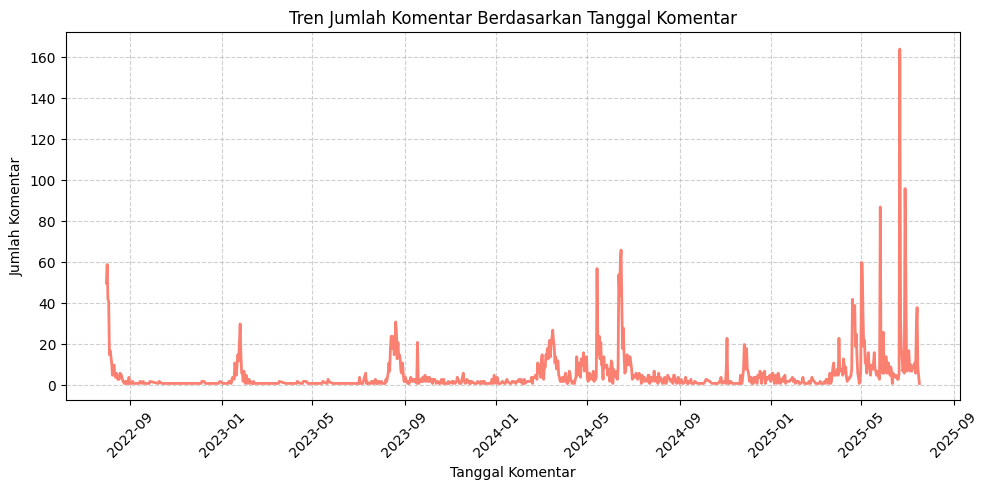

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Pastikan kolom 'updated' berformat datetime
df_final['updated'] = pd.to_datetime(df_final['publishedAt'])

# Hitung jumlah komentar per tanggal komentar
daily_comments = df_final.groupby(df_final['updated'].dt.date).size().reset_index(name='jumlah_komentar')

# Ubah kembali kolom tanggal jadi datetime untuk plotting
daily_comments['updated'] = pd.to_datetime(daily_comments['updated'])

# Visualisasi
plt.figure(figsize=(10, 5))
plt.plot(daily_comments['updated'], daily_comments['jumlah_komentar'], color='salmon', linewidth=2)
plt.title('Tren Jumlah Komentar Berdasarkan Tanggal Komentar')
plt.xlabel('Tanggal Komentar')
plt.ylabel('Jumlah Komentar')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

interpretasi
- Grafik menunjukkan fluktuasi jumlah komentar dari Agustus 2022 hingga sekitar Juli 2025.

- Ada beberapa lonjakan tajam (spike) yang signifikan, terutama mulai awal 2024 hingga pertengahan 2025, dengan puncak tertinggi terjadi sekitar Mei–Juni 2025, melebihi 160 komentar dalam satu hari.

- Periode sebelum pertengahan 2023 tampak relatif tenang dan stabil, dengan jumlah komentar per hari sangat rendah atau mendekati nol.

# VISUALISASI ANALISIS SENTIMEN

In [ ]:
# Membuat dataframe baru tanpa duplikasi berdasarkan teks untuk analisis sentimen
# Agar tidak dipengaruhi oleh adanya spam ataupun buzzer
df2 = df_bersih.drop_duplicates(subset=['clean_teks'])
# Pastikan kolom 'stem_teks' bertipe string dan tangani nilai NaN sebelum menerapkan fungsi
df2['stem_teks'] = df2['stem_teks'].fillna('').astype(str)
df2.shape

/tmp/ipython-input-288-2269520086.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['stem_teks'] = df2['stem_teks'].fillna('').astype(str)


(4755, 9)

In [ ]:
# Mengolah kembali stopword, karena terdapat kata-kata baru yang mengganggu Word Cloud
# Hal ini di karenakan kata-kata tersebut muncul di semua kategori (di permasalahan sentimen)
# stopword khusus
stopword_nat = {'rakyat','negara','anggar','iya', 'perintah', 'potong','uang', 'indonesia','owalah','diksh','le', 'orang'}

In [ ]:
# Fungsi Pembersih stopword
def clean_text(text, stopwords):
    # Mengubah teks menjadi huruf kecil (ini sudah dilakukan sebelumnya, tapi baiknya tetap ada di sini)
    text = str(text).lower() # Ensure text is a string and convert to lowercase

    # Tokenisasi menggunakan TextBlob
    tokens = TextBlob(text).words

    # Menghapus stopwords
    filtered_tokens = [token for token in tokens if token not in stopwords]

    # Menggabungkan kembali token menjadi teks
    return ' '.join(filtered_tokens)



# Membuat kolom baru tanpa stopword khusus
df2['stem_teksnew'] = df2['stem_teks'].apply(lambda x: clean_text(x, stopword_nat))

/tmp/ipython-input-290-3412289334.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['stem_teksnew'] = df2['stem_teks'].apply(lambda x: clean_text(x, stopword_nat))


## TOP 10 (2 KATA)

/tmp/ipython-input-291-2789192649.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=np.array(trigram_freqs), y=np.array(trigrams), palette='viridis')


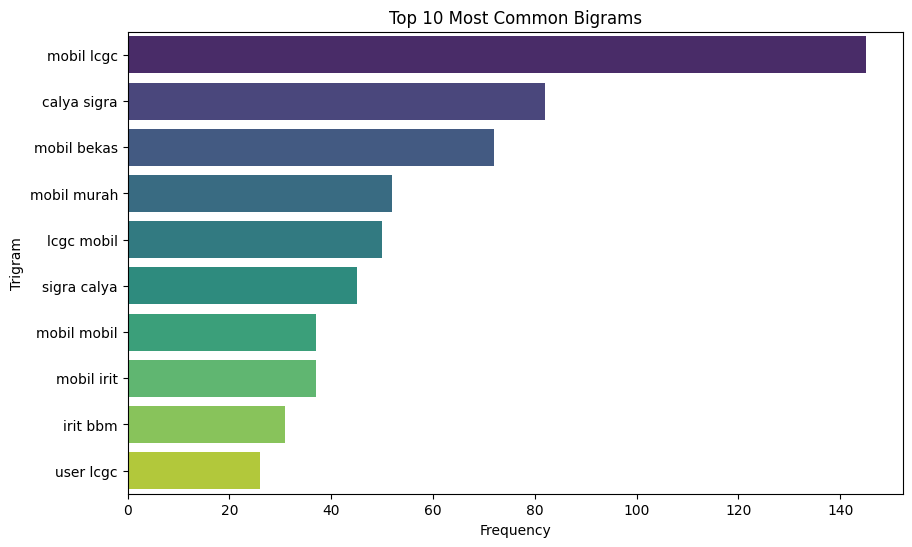

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Membuat trigram
vectorizer = CountVectorizer(ngram_range=(2, 2))
X = vectorizer.fit_transform(df2['stem_teks'])

# Hitung frekuensi trigram
trigram_counts = X.sum(axis=0).A1
trigram_features = vectorizer.get_feature_names_out()

# Ambil 10 trigram paling sering
top_10_trigrams = sorted(zip(trigram_counts, trigram_features), reverse=True)[:10]
trigram_freqs, trigrams = zip(*top_10_trigrams)

# Visualisasi
plt.figure(figsize=(10, 6))
sns.barplot(x=np.array(trigram_freqs), y=np.array(trigrams), palette='viridis')
plt.title('Top 10 Most Common Bigrams')
plt.xlabel('Frequency')
plt.ylabel('Trigram')
plt.show()


## PIE CHART SENTIMEN

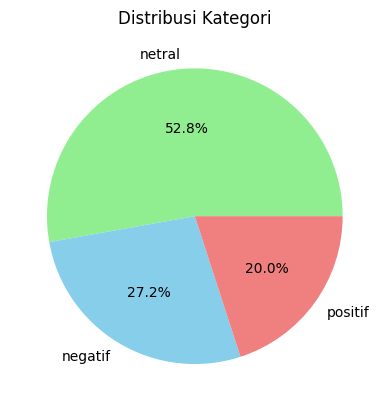

In [ ]:
# Menghitung distribusi kategori
category_counts = df2['label sentiment'].value_counts()

# Membuat pie chart
category_counts.plot.pie(autopct='%1.1f%%', colors=['lightgreen', 'skyblue', 'lightcoral'])

# Menambahkan judul
plt.title('Distribusi Kategori')

# Menampilkan chart
plt.ylabel('')  # Menghilangkan label y agar lebih rapi
plt.show()

## WORD CLOUD DAN WORD LINK POSITIF

In [ ]:
dfpos = df2[df2['label sentiment']=='positif']

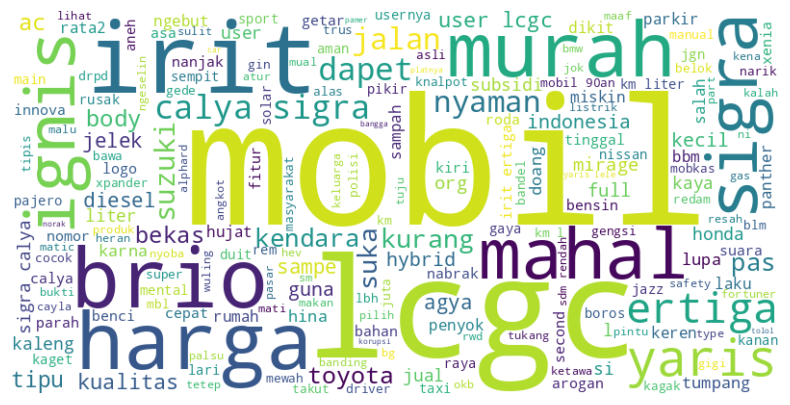

In [ ]:
# Gabungkan kolom teks jika ada
text_pos = " ".join(dfpos['stem_teks'])

# Generate dan tampilkan word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_pos)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
stop_new = {'row seat','km liter', 'seat row', 'row baris', 'main ambil4d', 'chevrolet spin', 'ertiga solar', 'ertiga diesel', 'tu', 'jg', 'ah','kyk', 'mobil2', 'liat', 'kaki', 'tau', '20km', 'tol', 'kali', 'byk', 'ala', 'kl', 'skrg','1', 'aj', 'ban', 'g', 'ah', 'sy', 'km 1', 'kek', 'msh', 'asa', 'msh', }

## WORD CLOUD DAN WORD LINK NEGATIF

In [ ]:
dfneg = df2[df2['label sentiment']=='negatif']

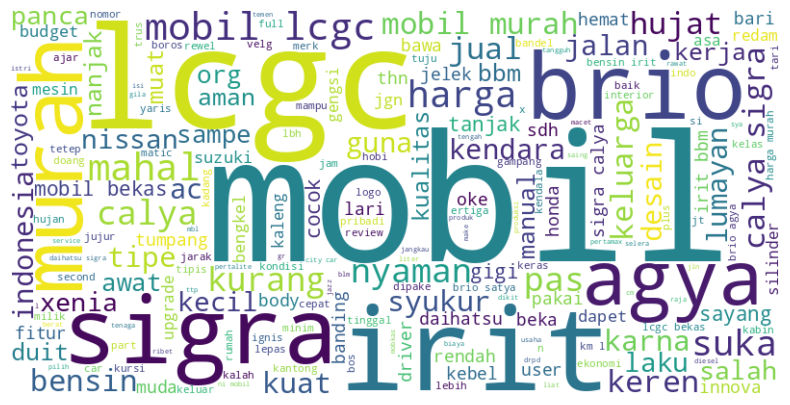

In [ ]:
# Gabungkan kolom teks jika ada
text_neg = " ".join(dfneg['stem_teks'])

# Generate dan tampilkan word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_neg)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## WORD CLOUD SENTIMEN GABUNGAN

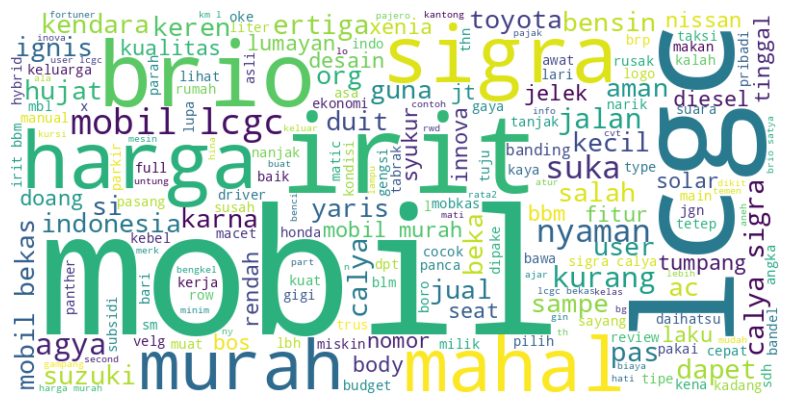

In [ ]:
# Gabungkan kolom teks jika ada
text = " ".join(df2['stem_teks'])

# Generate dan tampilkan word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## PRESENTASE SENTIMEN TIAP VIDIO

In [ ]:
df_gabung = df_bersih[['videoId','label sentiment','text']].merge(df_bersih, how='left', left_on='videoId', right_on='videoId')
df_gabung['info_video'] = df_gabung['publishedAt'] + ' | ' + df_gabung['video_title']
df_gabung.head()

,videoId,label sentiment_x,text_x,publishedAt,likeCount,video_title,hashtags,text_y,label sentiment_y,clean_teks,stem_teks,info_video
0,b5ibmpuS0L4,negatif,wah ini sih mobil kesukaan aku nih yang manual...,2025-06-06 09:37:47+00:00,0,Toyota Agya 2024 / Mobil LCGC Pilihan Keluarga...,#automobile,wah ini sih mobil kesukaan aku nih yang manual...,negatif,mobil kesukaan manual 2024 putih terbaru suka ...,mobil suka manual 2024 putih baru suka mobil n...,2025-06-06 09:37:47+00:00 | Toyota Agya 2024 /...
1,b5ibmpuS0L4,negatif,wah ini sih mobil kesukaan aku nih yang manual...,2025-04-15 13:18:52+00:00,0,Toyota Agya 2024 / Mobil LCGC Pilihan Keluarga...,#automobile,mobil toyota agya,negatif,mobil toyota agya,mobil toyota agya,2025-04-15 13:18:52+00:00 | Toyota Agya 2024 /...
2,b5ibmpuS0L4,negatif,wah ini sih mobil kesukaan aku nih yang manual...,2025-03-04 13:54:29+00:00,0,Toyota Agya 2024 / Mobil LCGC Pilihan Keluarga...,#automobile,harganya berapa ni bos,netral,ni bos,ni bos,2025-03-04 13:54:29+00:00 | Toyota Agya 2024 /...
3,b5ibmpuS0L4,negatif,wah ini sih mobil kesukaan aku nih yang manual...,2024-11-03 08:30:43+00:00,2,Toyota Agya 2024 / Mobil LCGC Pilihan Keluarga...,#automobile,sayang banget buat videonya terlalu cepat terl...,netral,sayang videonya cepat pendek lihat interiornya,sayang video cepat pendek lihat interior,2024-11-03 08:30:43+00:00 | Toyota Agya 2024 /...
4,b5ibmpuS0L4,negatif,mobil toyota agya,2025-06-06 09:37:47+00:00,0,Toyota Agya 2024 / Mobil LCGC Pilihan Keluarga...,#automobile,wah ini sih mobil kesukaan aku nih yang manual...,negatif,mobil kesukaan manual 2024 putih terbaru suka ...,mobil suka manual 2024 putih baru suka mobil n...,2025-06-06 09:37:47+00:00 | Toyota Agya 2024 /...


## HASHTAGS ANALISIS


In [ ]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Pastikan kolom 'hashtags' bertipe string
df_final['hashtags'] = df_final['hashtags'].fillna('').astype(str)

# 2. Buat kolom list hashtag (tanpa tanda #)
df_final['hashtag_list'] = df_final['hashtags'].apply(lambda x: [tag.replace('#', '').strip() for tag in x.split() if tag.strip()])

# 3. Gabungkan semua hashtag jadi satu list
all_hashtags = [tag for sublist in df_final['hashtag_list'] for tag in sublist]

# 4. Hitung frekuensi
hashtag_counts = Counter(all_hashtags)

# 5. Buat DataFrame dari frekuensi hashtag
df_hashtag = pd.DataFrame(hashtag_counts.items(), columns=['hashtag', 'jumlah']).sort_values(by='jumlah', ascending=False)

# 6. Tampilkan 10 hashtag teratas
print("10 hashtag terpopuler:")
print(df_hashtag.head(10))


10 hashtag terpopuler:
       hashtag  jumlah
1    mobillcgc    1496
6         lcgc    1361
18   mobilirit    1071
15  mobilmurah     956
13        agya     806
3       shorts     788
22       yaris     786
21        brio     786
20      avanza     786
19       mobil     786


/tmp/ipython-input-301-1803494050.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_hashtag.head(15), x='jumlah', y='hashtag', palette='coolwarm')


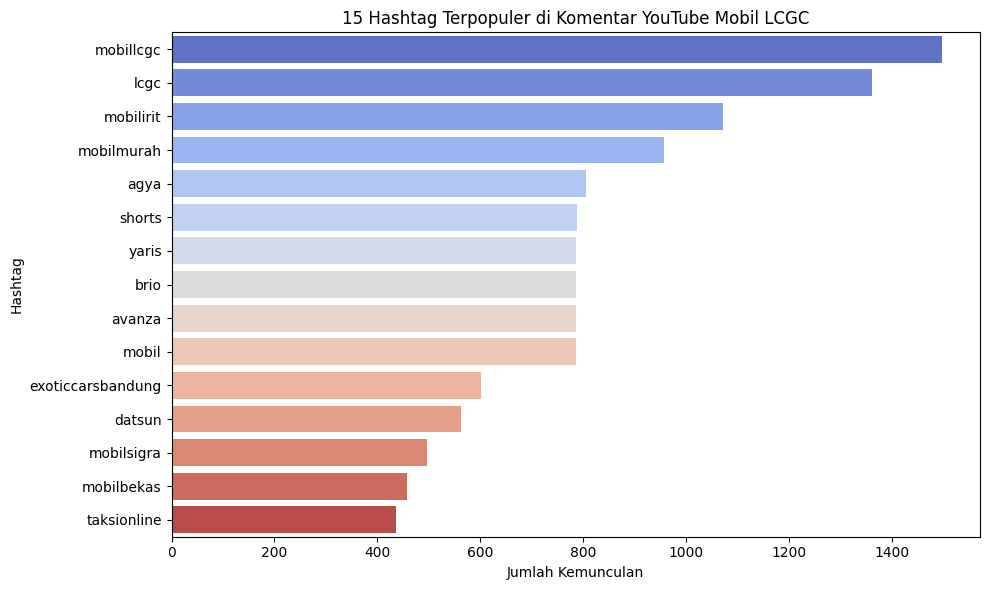

In [ ]:
# Visualisasi 15 hashtag teratas
plt.figure(figsize=(10,6))
sns.barplot(data=df_hashtag.head(15), x='jumlah', y='hashtag', palette='coolwarm')
plt.title('15 Hashtag Terpopuler di Komentar YouTube Mobil LCGC')
plt.xlabel('Jumlah Kemunculan')
plt.ylabel('Hashtag')
plt.tight_layout()
plt.show()


# TOPIC MODELING

In [ ]:
!pip install gensim



In [ ]:
import gensim
from gensim import corpora

# 1. Tokenisasi setiap dokumen dari kolom 'stem_teks'
texts = [text.split() for text in df_final['stem_teks']]

# 2. Buat dictionary
dictionary = corpora.Dictionary(texts)

# 3. Filter kata yang terlalu jarang atau terlalu umum
dictionary.filter_extremes(no_below=5, no_above=0.5)

# 4. Buat corpus
corpus = [dictionary.doc2bow(text) for text in texts]

# 5. Bangun model LDA
lda_model = gensim.models.LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=6,         # kamu bisa ganti jumlah topik
    random_state=42,
    passes=10,
    alpha='auto',
    per_word_topics=True
)


In [ ]:
# Tampilkan topik dengan format tertata
print("=== Topik dari Hasil LDA ===\n")

for i in range(lda_model.num_topics):
    # Ambil 10 kata teratas dari topik ke-i
    topic_terms = lda_model.show_topic(i, topn=10)
    words_only = ", ".join([term[0] for term in topic_terms])

    print(f"Topik {i+1:>2}: {words_only}")


=== Topik dari Hasil LDA ===

Topik  1: brio, ertiga, agya, sigra, irit, mobil, tabrak, solar, daihatsu, lumayan
Topik  2: lcgc, mobil, bekas, harga, mahal, brio, murah, honda, mobkas, toyota
Topik  3: mobil, lcgc, user, yaris, guna, suka, nomor, mbl, lbh, hybrid
Topik  4: mobil, irit, lcgc, murah, kendara, bensin, bbm, jalan, ignis, gengsi
Topik  5: 3, mobil, seat, 7, row, pas, main, salah, kurang, baris
Topik  6: mobil, sigra, calya, 1, jual, keren, nyaman, bekas, irit, xenia


In [ ]:
!pip install pyLDAvis


In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis  # khusus untuk model gensim
from gensim import corpora

# Visualisasi inter-topic distance map
pyLDAvis.enable_notebook()  # untuk tampilan di notebook
vis_data = gensimvis.prepare(lda_model, corpus, dictionary)

# Tampilkan visualisasinya
pyLDAvis.display(vis_data)


#Rekomendasi
1. Penguatan Citra Brand pada Merek Populer

    Hasil analisis menunjukkan frekuensi tinggi penyebutan merek-merek seperti Brio, Agya, Sigra, dan Ertiga. Oleh karena itu, strategi promosi sebaiknya difokuskan pada penguatan brand awareness terhadap merek-merek ini yang telah dikenal luas di segmen LCGC.

2. Fokus pada Narasi Efisiensi dan Harga Terjangkau

  Topik yang berkaitan dengan efisiensi bahan bakar dan harga muncul konsisten dalam diskusi publik. Hal ini menunjukkan pentingnya memposisikan LCGC sebagai solusi mobil hemat BBM dan ekonomis, khususnya di tengah tekanan ekonomi masyarakat.

3. Edukasi Pasar Mengenai Mobil Bekas LCGC

  Banyak komentar berkaitan dengan harga dan kondisi mobil bekas, mengindikasikan adanya keraguan calon konsumen. Perlu dilakukan kampanye edukatif mengenai kualitas mobil LCGC bekas agar persepsi pasar meningkat dan potensi penjualan mobil bekas LCGC dapat dimaksimalkan.

4. Pemanfaatan Ulasan dan Pengalaman Pengguna

  Komentar dari pengguna menunjukkan bahwa pengalaman pribadi memainkan peran penting dalam membentuk opini publik. Strategi komunikasi dapat memanfaatkan user-generated content dan testimoni nyata untuk meningkatkan kepercayaan dan minat calon pembeli.

5. Segmentasi Pasar Berdasarkan Kebutuhan Kapasitas dan Kenyamanan

  Munculnya topik tentang jumlah tempat duduk dan kapasitas kendaraan menunjukkan pentingnya kebutuhan praktis konsumen. Oleh karena itu, segmentasi produk dapat diarahkan pada keluarga muda dan pengguna ride-sharing dengan menonjolkan fitur kapasitas dan kenyamanan.

#Kesimpulan
1. Sentimen masyarakat cenderung netral:
Sebagian besar respon masyarakat terhadap mobil LCGC (Low Cost Green Car) tergolong netral. Meskipun begitu, jumlah komentar dengan sentimen positif dan negatif relatif seimbang, yang mengindikasikan bahwa belum ada dominasi persepsi emosional yang kuat, baik mendukung maupun menolak keberadaan mobil ini.

2. Sentimen positif didominasi isu harga dan efisiensi:
Banyak komentar positif menyoroti keunggulan LCGC dari segi harga yang terjangkau dan irit bahan bakar, dua faktor utama yang menjadi daya tarik bagi konsumen. Ini terlihat dari penggunaan tagar seperti #mobillcgc, #mobilmurah, dan #mobilirit, yang menunjukkan bahwa publik memandang LCGC sebagai solusi transportasi yang ekonomis dan efisien.

3. Mobil LCGC dinilai menghemat biaya dan energi:
Persepsi iritnya konsumsi bahan bakar berkontribusi pada anggapan bahwa LCGC dapat membantu masyarakat mengurangi pengeluaran bulanan untuk transportasi sekaligus lebih ramah lingkungan, sejalan dengan konsep mobil hemat energi yang diusung pemerintah.

4. Topik utama yang sering dibahas di media sosial meliputi:

Merek-merek mobil LCGC populer yang tersedia di pasar, seperti Toyota Agya,

*   Merek-merek mobil LCGC populer yang tersedia di pasar, seperti Toyota Agya, Daihatsu Ayla, Honda Brio Satya, dan lainnya.
*   Harga jual mobil, diskon, dan paket pembiayaan yang ditawarkan oleh dealer.

*   List item
*   List item





Harga jual mobil, diskon, dan paket pembiayaan yang ditawarkan oleh dealer.

Kapasitas dan ukuran mobil, terutama kenyamanan penumpang dan daya tampung bagasi.

Pengalaman pengguna, termasuk ulasan terkait performa mobil, kenyamanan berkendara, dan kepuasan pasca pembelian.

5. Kecenderungan masyarakat mencerminkan kebutuhan praktis:
Diskusi seputar LCGC menunjukkan bahwa masyarakat Indonesia—terutama kelas menengah—memprioritaskan kendaraan yang terjangkau, fungsional, dan hemat energi, sesuai dengan kondisi ekonomi saat ini dan kebutuhan mobilitas harian di perkotaan.